In [1]:
import numpy as np
import pandas as pd
from anndata import AnnData
import scanpy as sc, anndata as ad
import scanpy.external as sce
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

from tqdm import tqdm

import statsmodels.api as sm
import statsmodels.stats.multitest as multi

seed = 0
np.random.seed(seed)

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis', transparent=False, frameon=False)  # low dpi (dots per inch) yields small inline figures

import matplotlib as mpl
# 2 lines below solved the facecolor problem.
# mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
sc.settings.autosave = True
sc.logging.print_header()

version = '230805_CD4T_Treg_DEGs'

results_file = '../scanpy/{}/res.h5ad'.format(version)

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)

sc.settings.figdir = '../scanpy/{}/graph'.format(version)
sc.settings.cachedir = '../scanpy/{}/cache'.format(version)
# %config InlineBackend.figure_format = 'retina'

import os
os.makedirs('../scanpy/{}'.format(version), exist_ok=True)
os.makedirs(sc.settings.figdir, exist_ok=True)


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.5 pynndescent==0.5.10


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
import symphonypy as sp

In [4]:
adata_ref = sc.read('../scanpy/230110_STR4.5.21_MS01.02.03.04_MG01.02.03_SL02.03.04_Tcell/res.h5ad')
adata_ref

AnnData object with n_obs × n_vars = 103153 × 1271
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'doublet_scores',

In [5]:
df_NMF = pd.read_csv('~/yyoshiaki-git/NMFprojection/data/NMF.W.CD4T.csv.gz', index_col=0)
df_NMF.head()

NMF_0     NMF_1     NMF_2     NMF_3     NMF_4     NMF_5  \
LINC00115  0.028065  0.022414  0.022533  0.140076  0.046632  0.000000   
HES4       0.000000  0.002400  0.000000  0.062325  0.175762  0.000000   
ISG15      0.078505  0.016911  0.070525  0.053799  0.166165  0.208394   
TNFRSF18   0.000061  0.094786  0.732933  0.000000  0.000000  0.342539   
TNFRSF4    0.000000  0.133513  0.550942  0.000000  0.000000  0.181082   

              NMF_6     NMF_7     NMF_8     NMF_9    NMF_10    NMF_11  
LINC00115  0.077666  0.000000  0.078949  0.032568  0.089939  0.021428  
HES4       0.000000  0.409772  0.000000  0.080368  0.000000  0.000000  
ISG15      0.147570  1.616325  0.118240  0.057102  0.223594  0.074722  
TNFRSF18   0.000000  0.000000  0.317724  0.000000  0.000000  0.000000  
TNFRSF4    0.239739  0.034151  0.946191  0.000000  0.000000  0.000000

In [6]:
th_mean = 0.1
list_gene = list(df_NMF.sort_values(by='NMF_1', ascending=False).head(50).index)

## SLE

In [7]:
proj = 'GSE174188'
disease = 'SLE'

In [8]:
adata = sc.read('../output/GSE174188/GSE174188_CD4T.h5ad')
adata.var.set_index('_index', inplace=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# target_sum for normalize_total() should be the same as in reference
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
adata.raw = adata

adata

filtered out 2656 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:03)


AnnData object with n_obs × n_vars = 405222 × 23060
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SymphonyQuery', 'nFeature_SymphonyQuery', 'nCount_SCT', 'nFeature_SCT', 'sample', 'disease', 'disease_duration', 'condition', 'age', 'race', 'sex', 'immunosuppressant', 'immunosuppressant_duration', 'batch', 'clusterL2', 'clusterL2_prob', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

In [9]:
batch_key_query = 'sample'
# query_clusters = 'cluster_L2'
labels = 'cluster_L2'

# Symphony
sp.tl.map_embedding(adata, adata_ref, key=batch_key_query)
# -> adata_query.obsm["X_pca_harmony"] <- Symphony adjusted query's PCA
sp.tl.per_cell_confidence(adata, adata_ref)

sp.tl.transfer_labels_kNN(adata, adata_ref, labels)
# -> adata_query.obs[labels] <- transferred labels (via sklearn kNN)


sp.tl.ingest(adata, adata_ref)
# -> adata_query.obsm["X_umap"] <- mapped to the reference's UMAP coords

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/symphonypy/tools.py:307: UserWarning: Not found `harmony` object in adata_ref.uns.
Assuming that adata_ref doesn't have any batches, and using 'X_pca' representation of adata_ref for clustering.
Otherwise, firstly run symphonypy.pp.harmony_integrate on adata_ref to account for them.
  warnings.warn(


164 out of 1271 genes from the reference are missing in the query dataset or have zero std in the reference, their expressions in the query will be set to zero


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


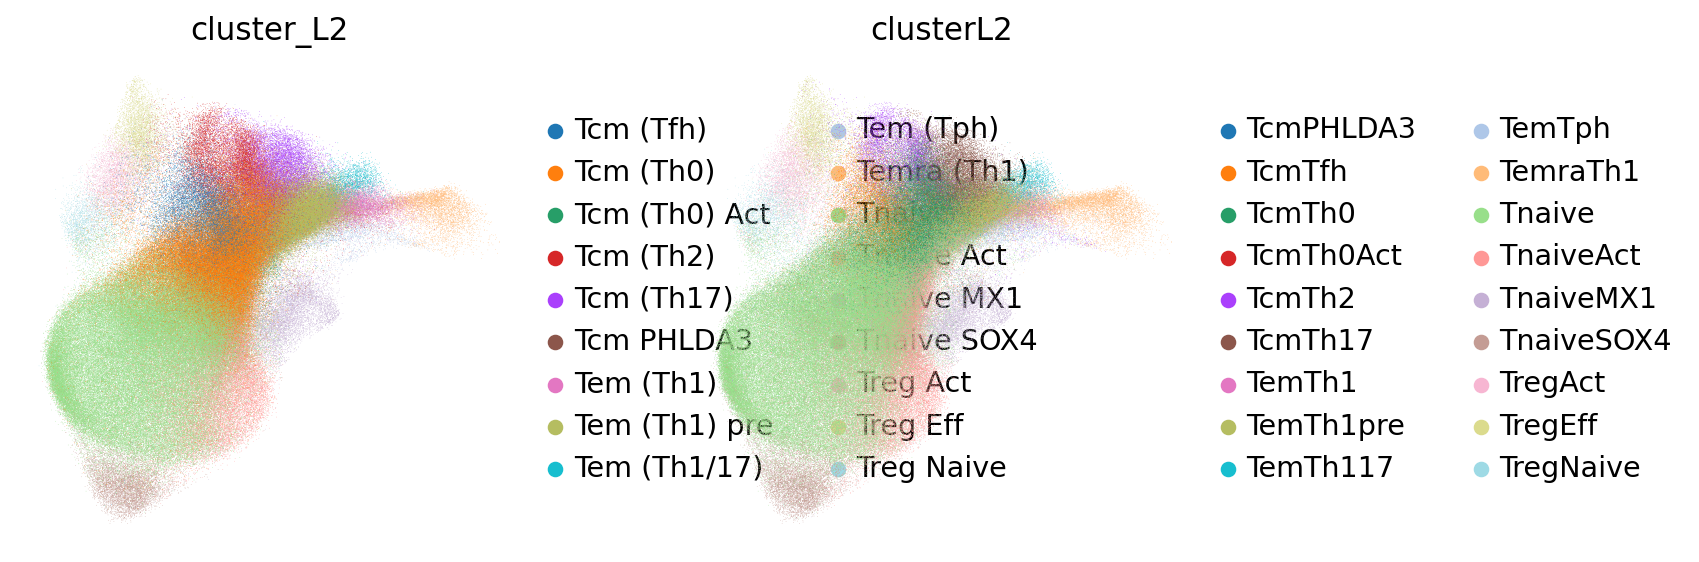

In [10]:
sc.pl.umap(adata, color=['cluster_L2', 'clusterL2'])

In [11]:
adata.var

features  n_cells
_index                             
RP11-34P13.7  RP11-34P13.7      189
RP11-34P13.8  RP11-34P13.8       11
AL627309.1      AL627309.1      913
RP11-34P13.9  RP11-34P13.9        4
AP006222.2      AP006222.2     4759
...                    ...      ...
AC011841.1      AC011841.1      610
AL354822.1      AL354822.1      697
KIR2DL2            KIR2DL2      230
PNRC2-1            PNRC2-1     3239
SRSF10-1          SRSF10-1     7780

[23060 rows x 2 columns]

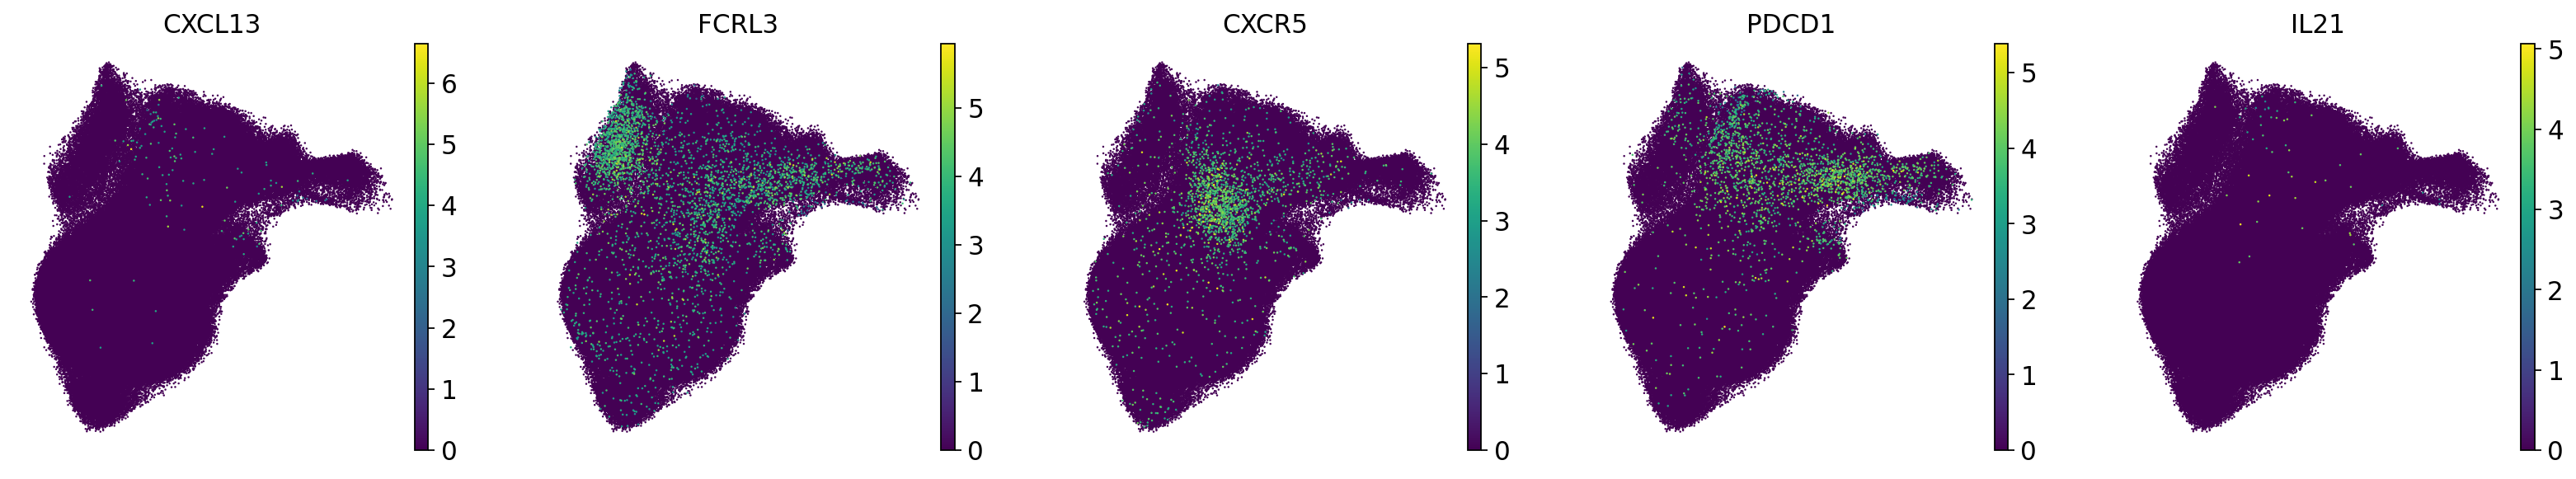

In [12]:
sc.pl.umap(adata, color=['CXCL13', 'FCRL3', 'CXCR5', 'PDCD1', 'IL21'],
          save=f'{proj}_Tph', ncols=5, sort_order=True, s=5)

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


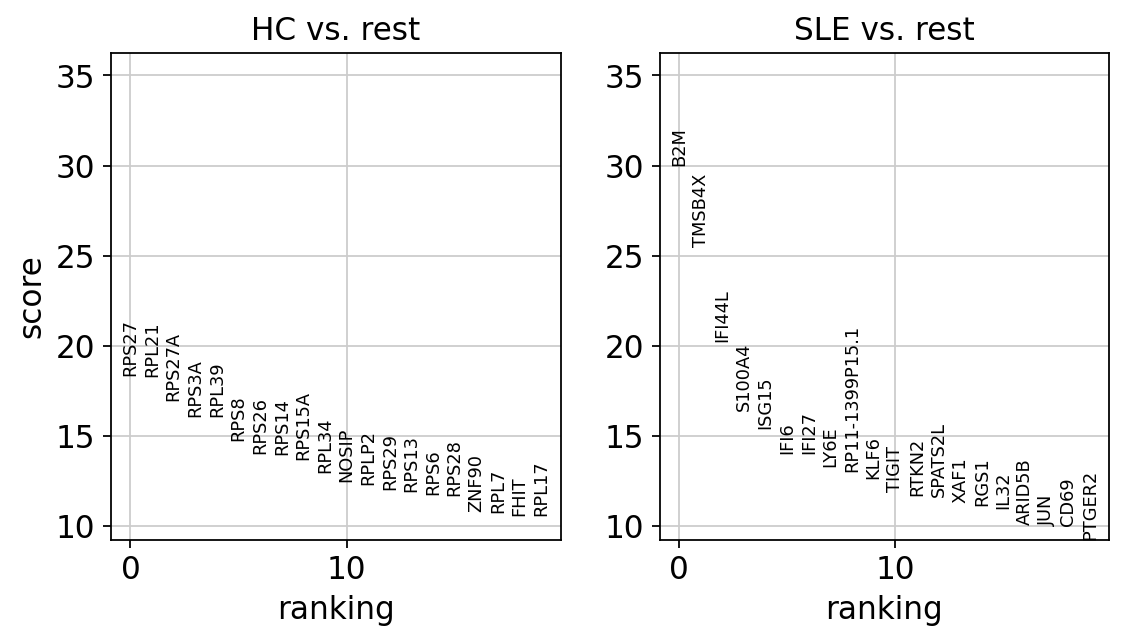

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


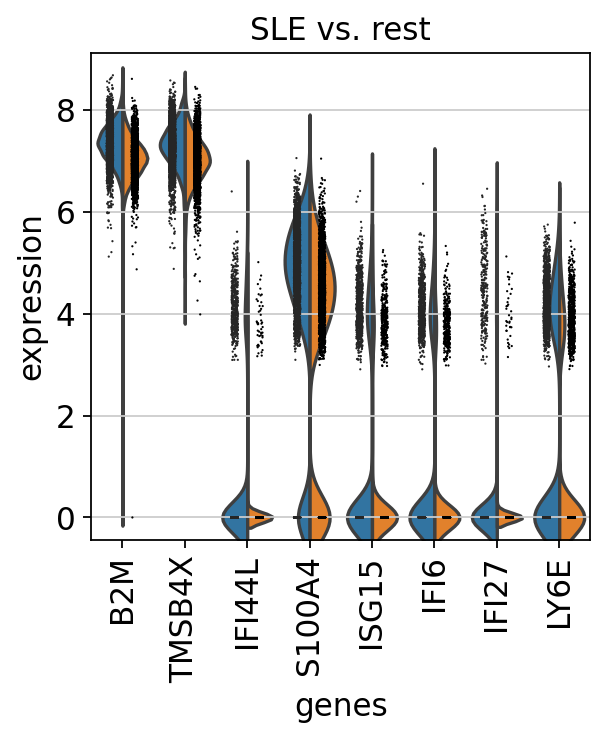

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


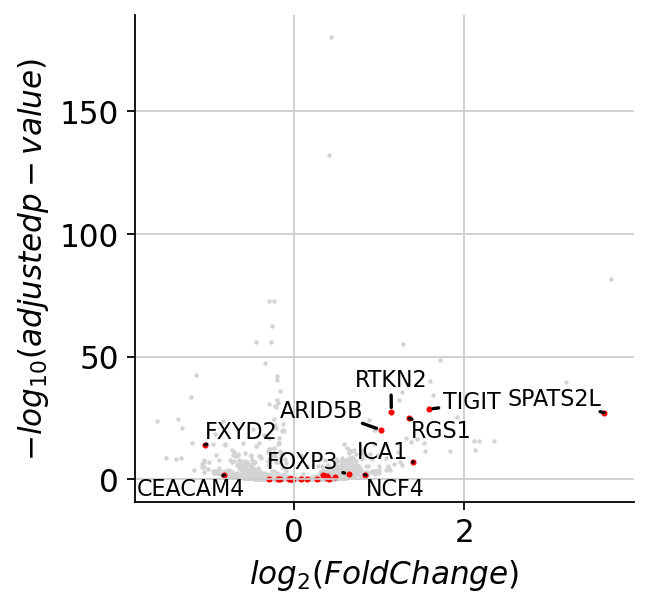

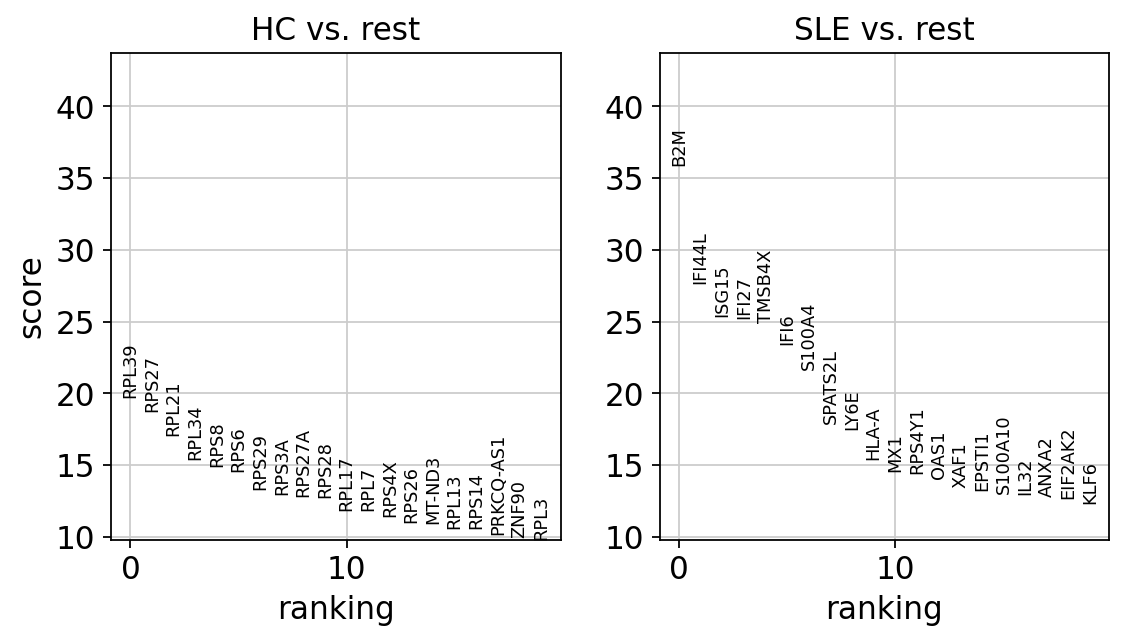

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


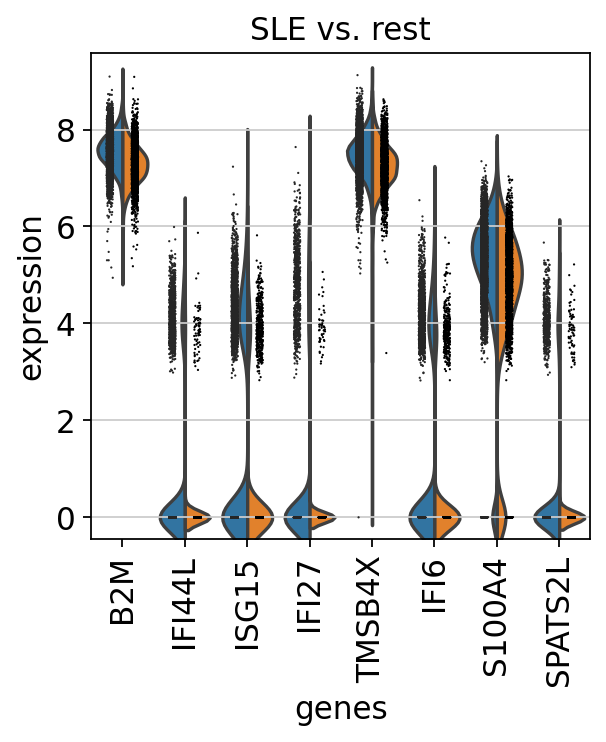

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


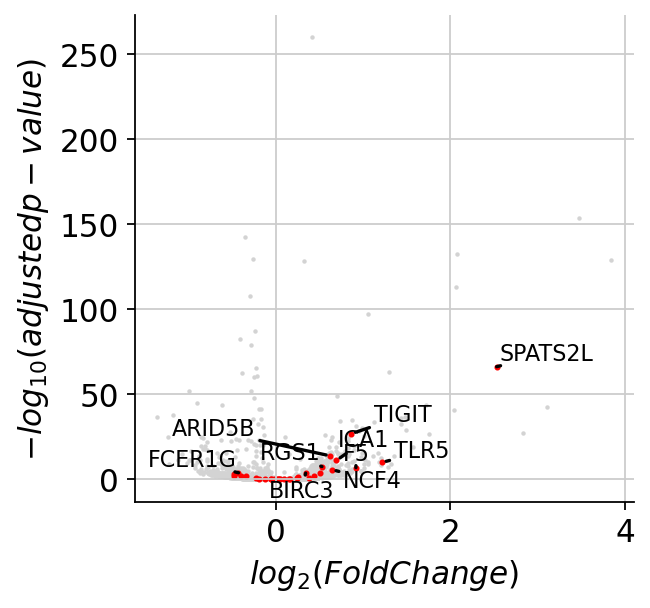

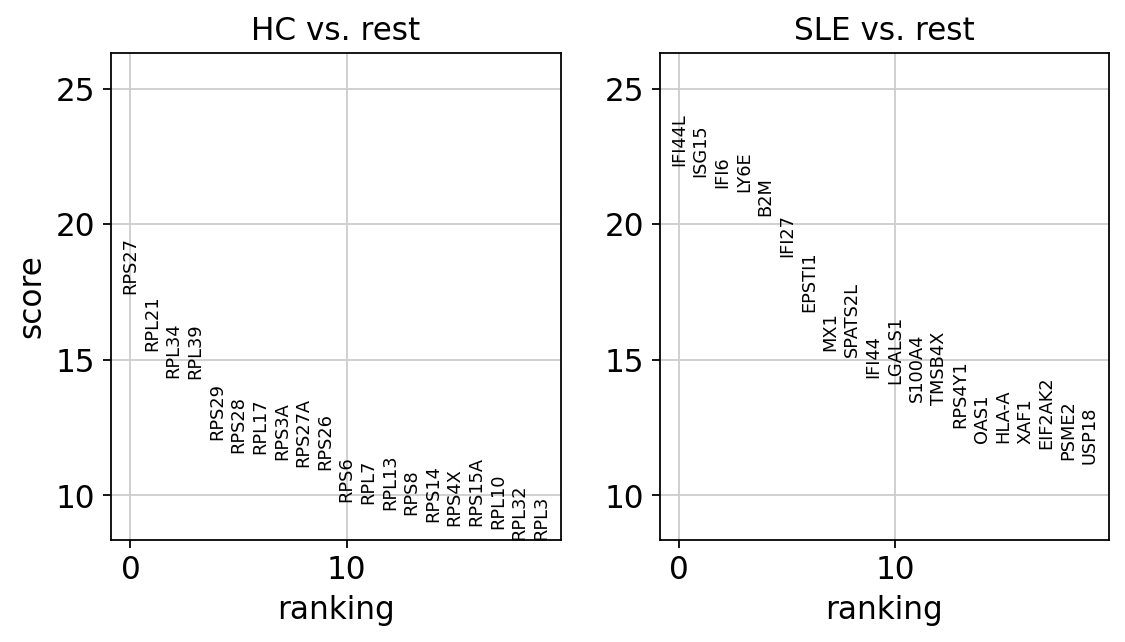

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


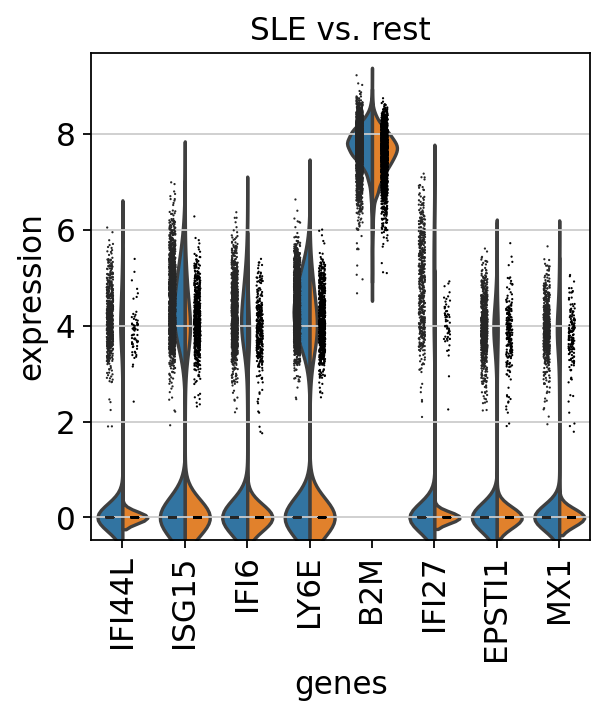

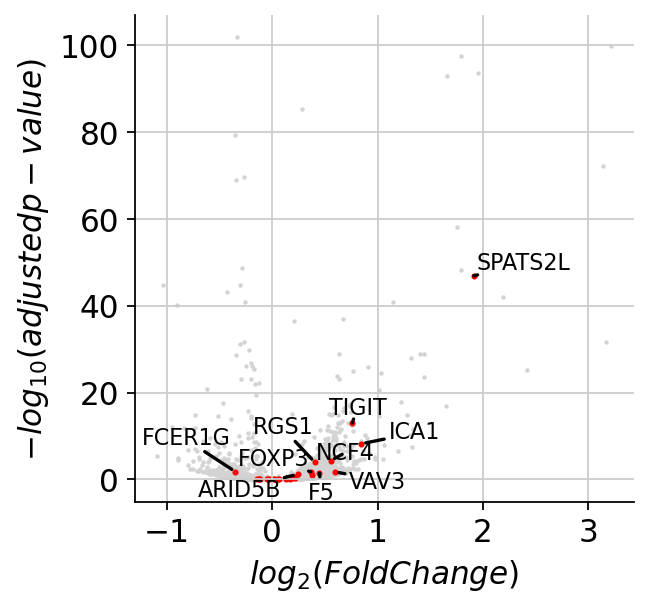

In [13]:
list_clusters = ['TregNaive', 'TregAct', 'TregEff']

for clu in list_clusters:
    a = adata[adata.obs['clusterL2'] == clu]

    sc.tl.rank_genes_groups(a, 'disease', method='t-test_overestim_var')
    sc.pl.rank_genes_groups(a, save=f'_{disease}_{clu}.pdf')
    sc.pl.rank_genes_groups_violin(a, groups='SLE', n_genes=8, save=f'_{disease}_{clu}.pdf')

    result = a.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    df_result = pd.DataFrame(
        {key: result[key][disease]
        for key in ['names', 'logfoldchanges', 'pvals', 'pvals_adj']})
    df_result = pd.merge(df_result, pd.DataFrame(a.raw.to_adata().to_df().mean(), columns=['mean']), left_on='names', right_index=True, how='left')
    df_result.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.csv')

    plt.scatter(x=df_result.loc[df_result['mean']>th_mean, 'logfoldchanges'], 
    y=-np.log10(df_result.loc[df_result['mean']>th_mean,'pvals_adj']), s=1, c='lightgray')

    d = df_result[(df_result['names'].isin(list_gene))&(df_result['mean']>th_mean)]
    plt.scatter(x=d['logfoldchanges'], 
        y=-np.log10(d['pvals_adj']), s=3, c='red')

    texts = []
    for pos,row in d.sort_values(by='pvals_adj').head(10).iterrows():
        texts.append(plt.text(row['logfoldchanges'], -np.log10(row['pvals_adj']), row['names'], size=10))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=1.5))
        
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(adjusted p-value)$')
    sns.despine()
    plt.savefig(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_scatter.pdf', bbox_inches='tight')

    d.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_NMF1.csv')

In [14]:
adata.write(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.h5ad')

## MS

In [15]:
proj = 'GSE144744'
disease = 'MS'

In [16]:
adata = sc.read(f'../output/{proj}/{proj}_CD4T.h5ad')
adata.var.set_index('_index', inplace=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# target_sum for normalize_total() should be the same as in reference
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
adata.raw = adata

adata

filtered out 479 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:01)


AnnData object with n_obs × n_vars = 148002 × 14861
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SymphonyQuery', 'nFeature_SymphonyQuery', 'nCount_SCT', 'nFeature_SCT', 'sample', 'disease', 'disease_duration', 'condition', 'age', 'race', 'sex', 'immunosuppressant', 'immunosuppressant_duration', 'batch', 'clusterL2', 'clusterL2_prob', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

152 out of 1271 genes from the reference are missing in the query dataset or have zero std in the reference, their expressions in the query will be set to zero
/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


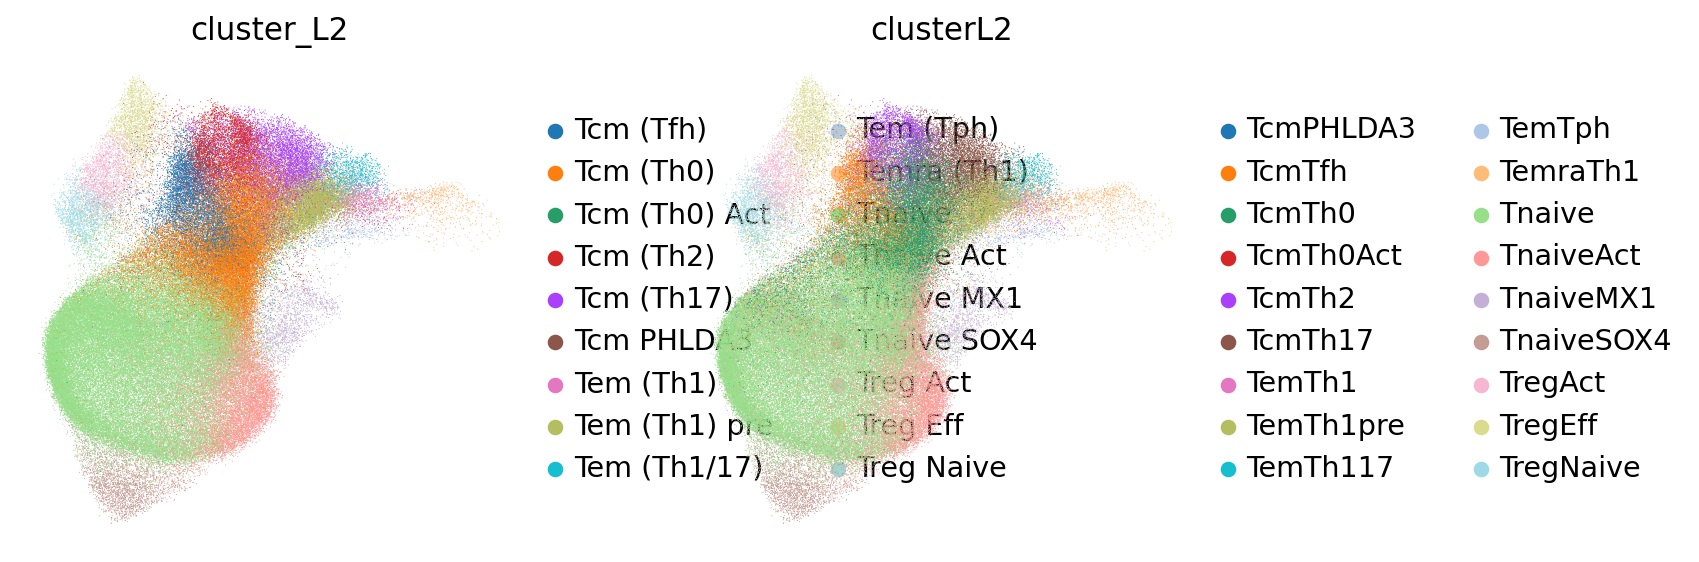

In [17]:
batch_key_query = 'sample'
# query_clusters = 'cluster_L2'
labels = 'cluster_L2'

# Symphony
sp.tl.map_embedding(adata, adata_ref, key=batch_key_query)
# -> adata_query.obsm["X_pca_harmony"] <- Symphony adjusted query's PCA
sp.tl.per_cell_confidence(adata, adata_ref)

sp.tl.transfer_labels_kNN(adata, adata_ref, labels)
# -> adata_query.obs[labels] <- transferred labels (via sklearn kNN)


sp.tl.ingest(adata, adata_ref)
# -> adata_query.obsm["X_umap"] <- mapped to the reference's UMAP coords

sc.pl.umap(adata, color=['cluster_L2', 'clusterL2'])

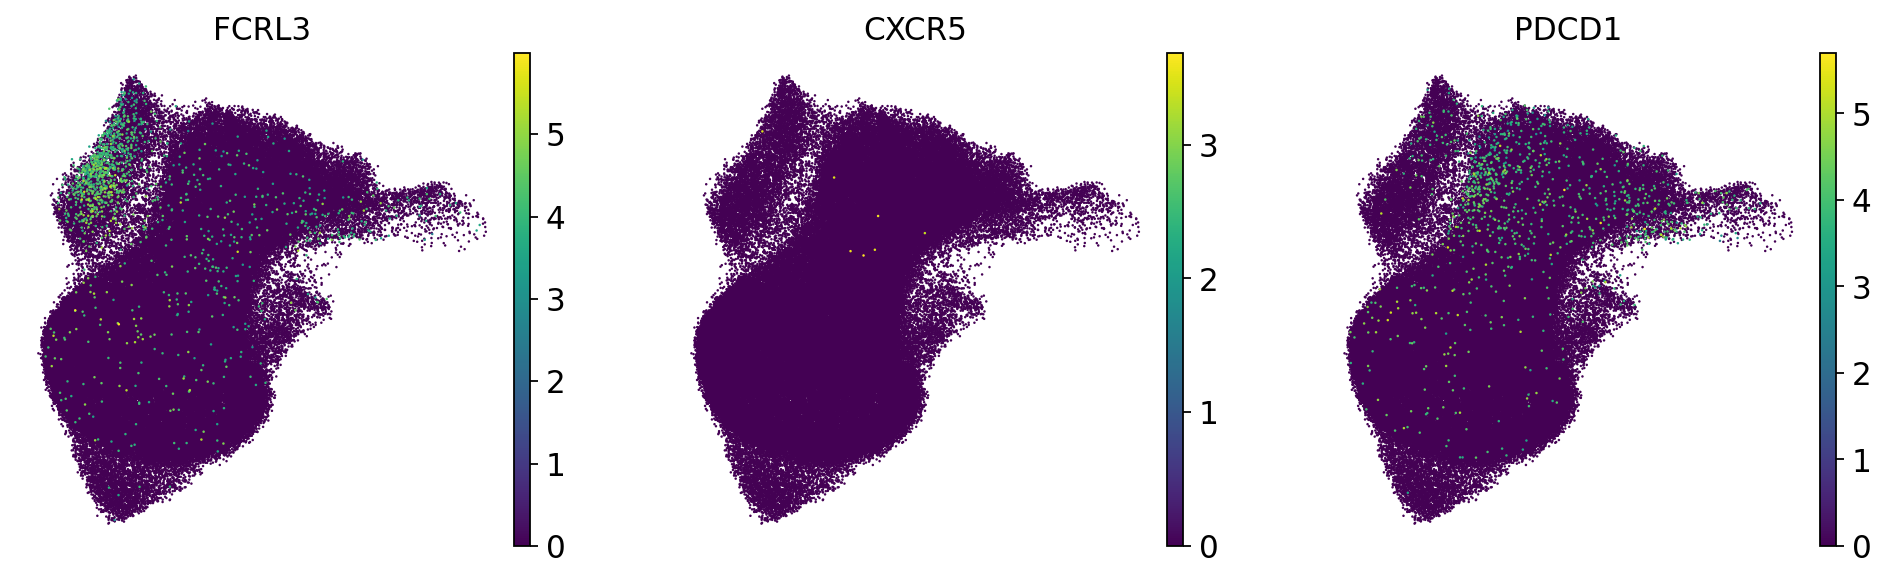

In [18]:
sc.pl.umap(adata, color=[x  for x in ['CXCL13', 'FCRL3', 'CXCR5', 'PDCD1', 'IL21'] if x in adata.raw.var.index],
          save=f'{proj}_Tph', ncols=5, sort_order=True, s=5)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


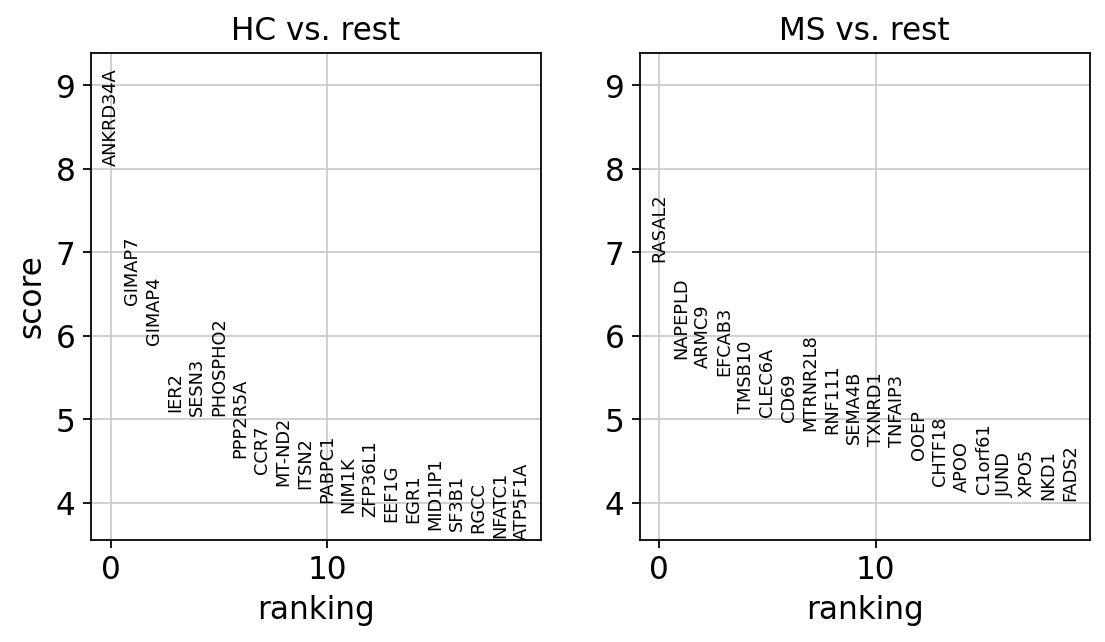

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


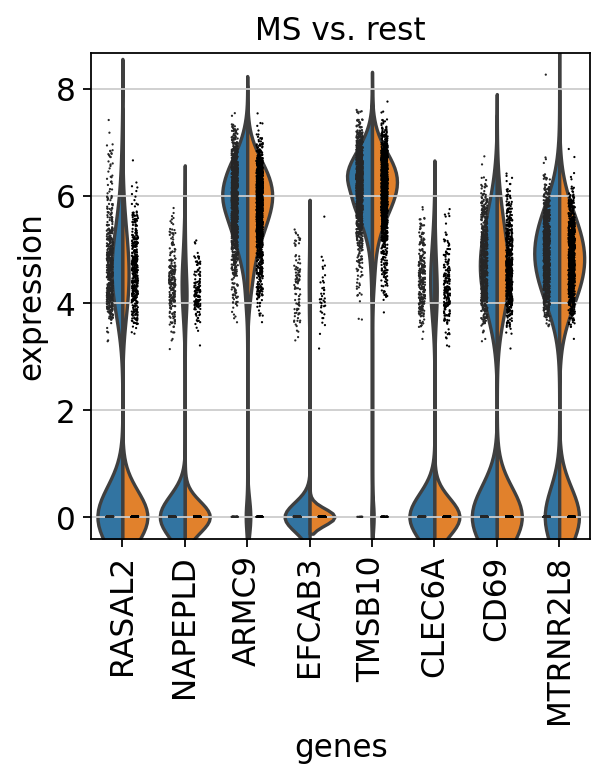

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


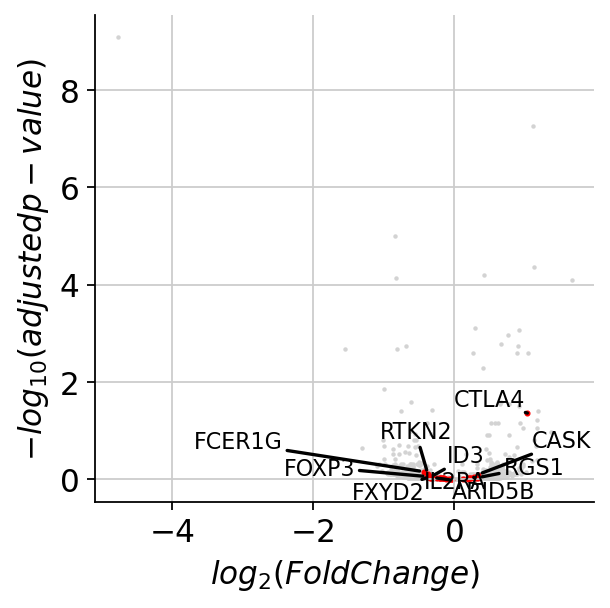

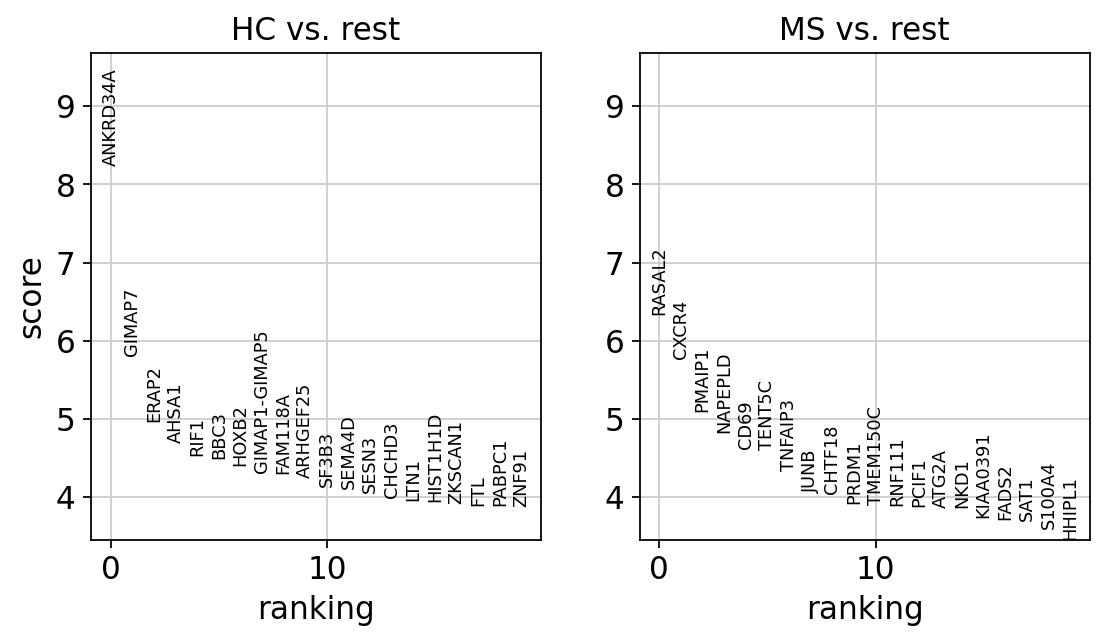

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


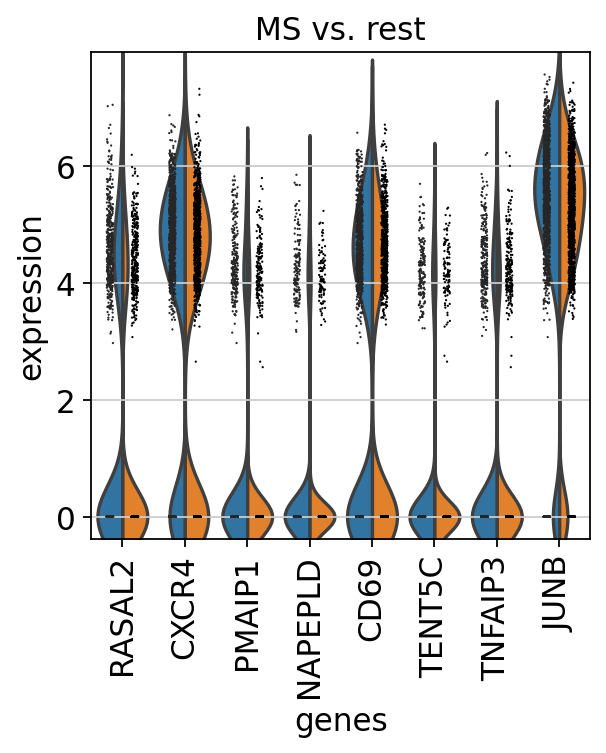

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


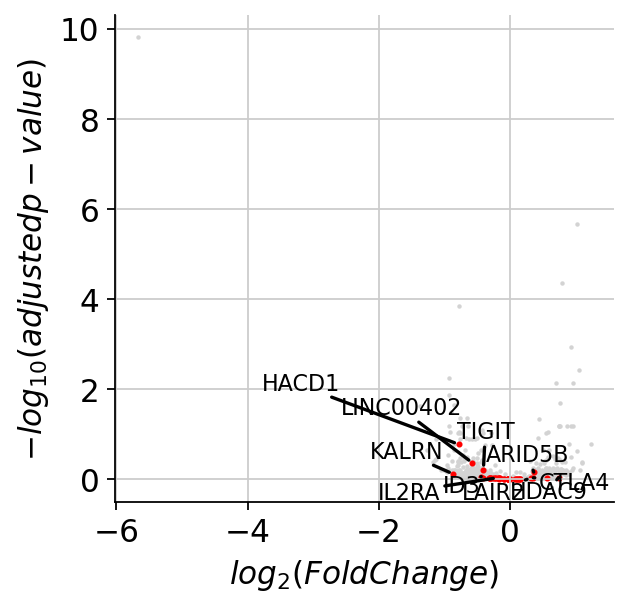

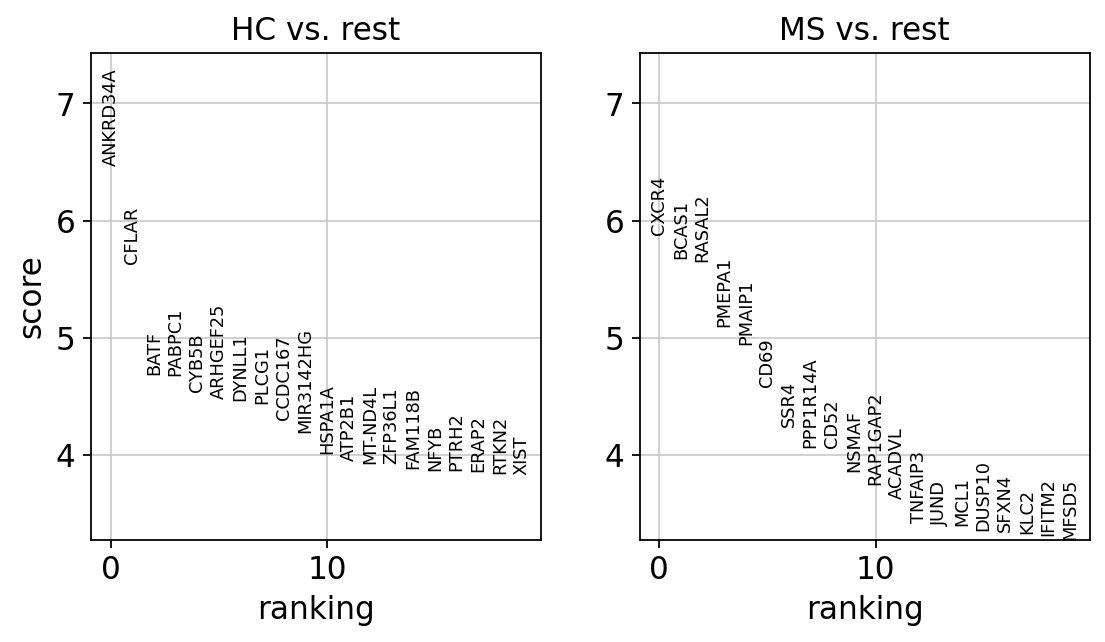

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


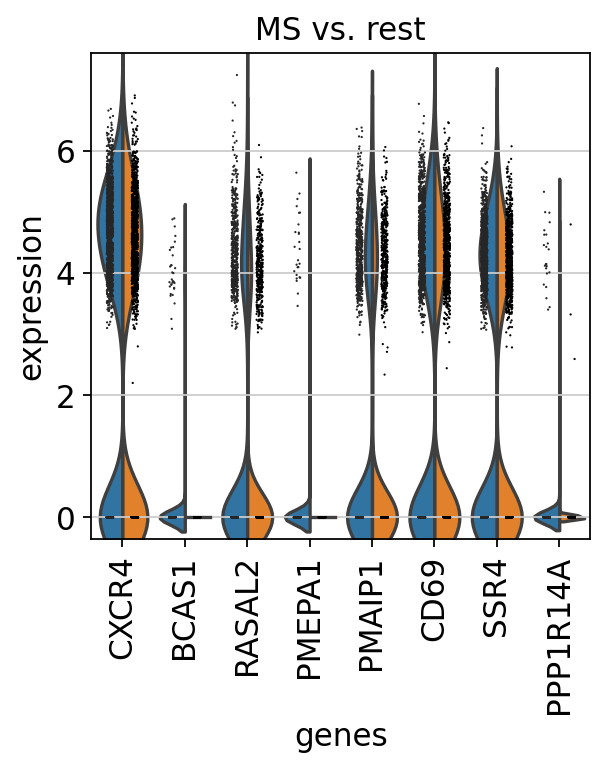

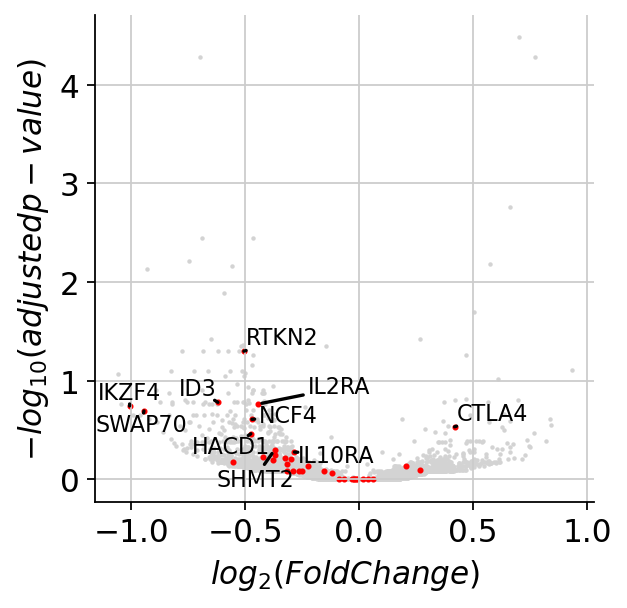

In [20]:
list_clusters = ['TregNaive', 'TregAct', 'TregEff']

for clu in list_clusters:
    a = adata[adata.obs['clusterL2'] == clu]

    sc.tl.rank_genes_groups(a, 'disease', method='t-test_overestim_var')
    sc.pl.rank_genes_groups(a, save=f'_{disease}_{clu}.pdf')
    sc.pl.rank_genes_groups_violin(a, groups=disease, n_genes=8, save=f'_{disease}_{clu}.pdf')

    result = a.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    df_result = pd.DataFrame(
        {key: result[key][disease]
        for key in ['names', 'logfoldchanges', 'pvals', 'pvals_adj']})
    df_result = pd.merge(df_result, pd.DataFrame(a.raw.to_adata().to_df().mean(), columns=['mean']), left_on='names', right_index=True, how='left')
    df_result.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.csv')

    plt.scatter(x=df_result.loc[df_result['mean']>th_mean, 'logfoldchanges'], 
    y=-np.log10(df_result.loc[df_result['mean']>th_mean,'pvals_adj']), s=1, c='lightgray')

    d = df_result[(df_result['names'].isin(list_gene))&(df_result['mean']>th_mean)]
    plt.scatter(x=d['logfoldchanges'], 
        y=-np.log10(d['pvals_adj']), s=3, c='red')

    texts = []
    for pos,row in d.sort_values(by='pvals_adj').head(10).iterrows():
        texts.append(plt.text(row['logfoldchanges'], -np.log10(row['pvals_adj']), row['names'], size=10))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=1.5))
        
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(adjusted p-value)$')
    sns.despine()
    plt.savefig(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_scatter.pdf', bbox_inches='tight')

    d.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_NMF1.csv')

In [21]:
adata.write(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.h5ad')

## T1D

In [22]:
proj = '1M_PBMC_T1D_Parse'
disease = 'T1D'

In [23]:
adata = sc.read(f'../output/{proj}/{proj}_CD4T.h5ad')
adata.var.set_index('_index', inplace=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# target_sum for normalize_total() should be the same as in reference
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)
adata.raw = adata

adata

filtered out 1966 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:03)


AnnData object with n_obs × n_vars = 240032 × 22971
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SymphonyQuery', 'nFeature_SymphonyQuery', 'nCount_SCT', 'nFeature_SCT', 'sample', 'disease', 'disease_duration', 'condition', 'age', 'race', 'sex', 'immunosuppressant', 'immunosuppressant_duration', 'batch', 'clusterL2', 'clusterL2_prob', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

88 out of 1271 genes from the reference are missing in the query dataset or have zero std in the reference, their expressions in the query will be set to zero
/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


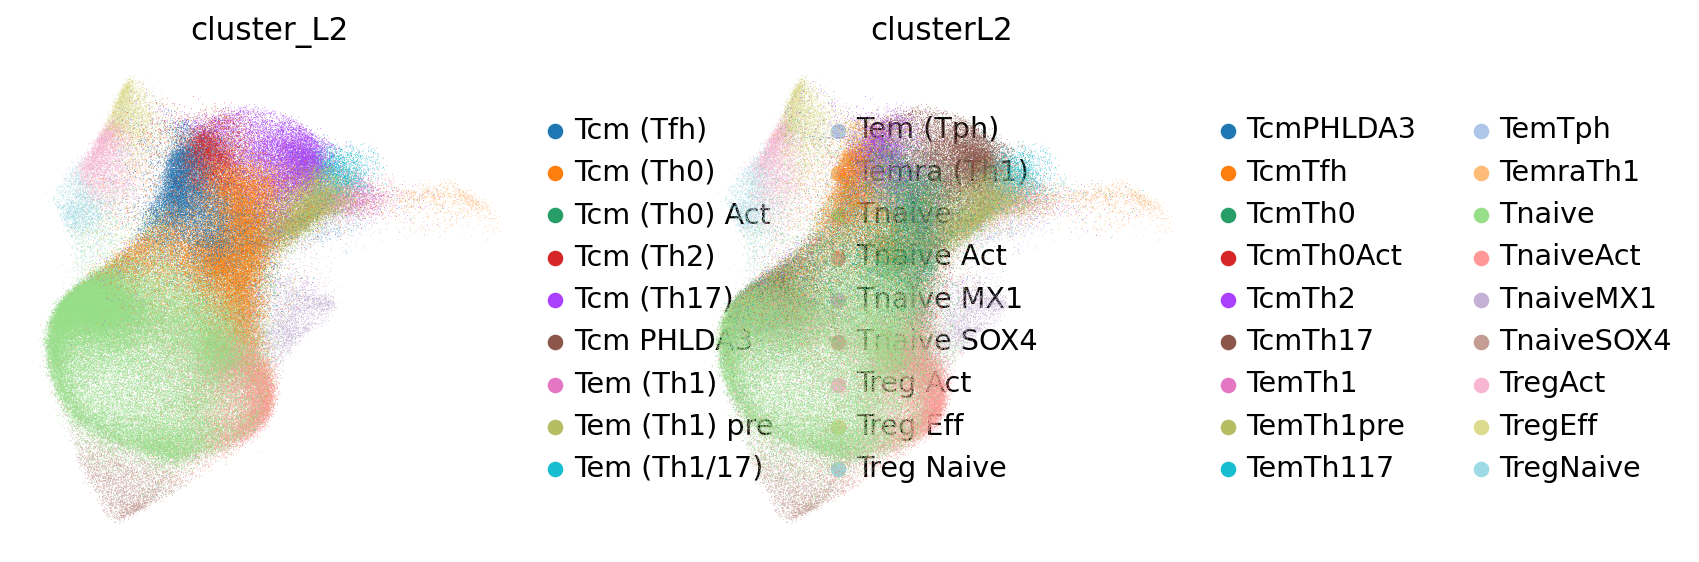

In [24]:
batch_key_query = 'sample'
# query_clusters = 'cluster_L2'
labels = 'cluster_L2'

# Symphony
sp.tl.map_embedding(adata, adata_ref, key=batch_key_query)
# -> adata_query.obsm["X_pca_harmony"] <- Symphony adjusted query's PCA
sp.tl.per_cell_confidence(adata, adata_ref)

sp.tl.transfer_labels_kNN(adata, adata_ref, labels)
# -> adata_query.obs[labels] <- transferred labels (via sklearn kNN)


sp.tl.ingest(adata, adata_ref)
# -> adata_query.obsm["X_umap"] <- mapped to the reference's UMAP coords

sc.pl.umap(adata, color=['cluster_L2', 'clusterL2'])

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


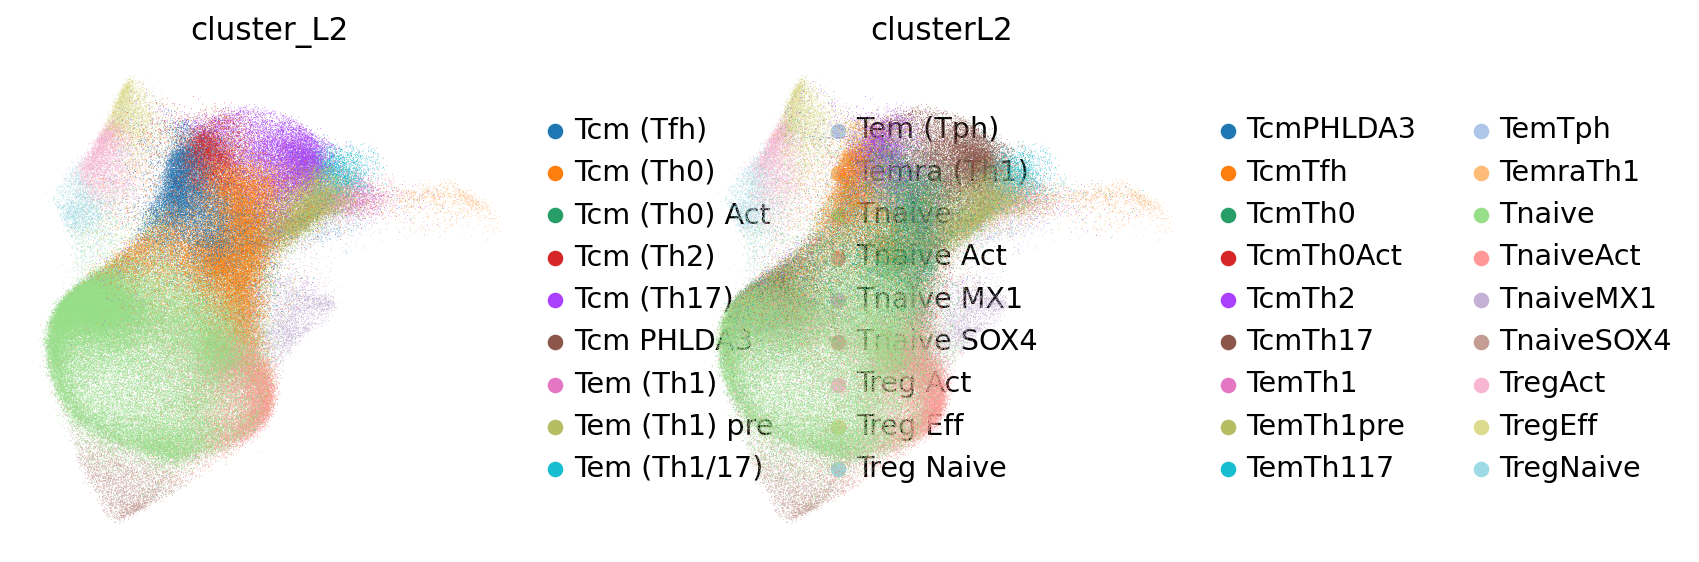

In [25]:
sc.pl.umap(adata, color=['cluster_L2', 'clusterL2'], save=f'{proj}_cluster.pdf')

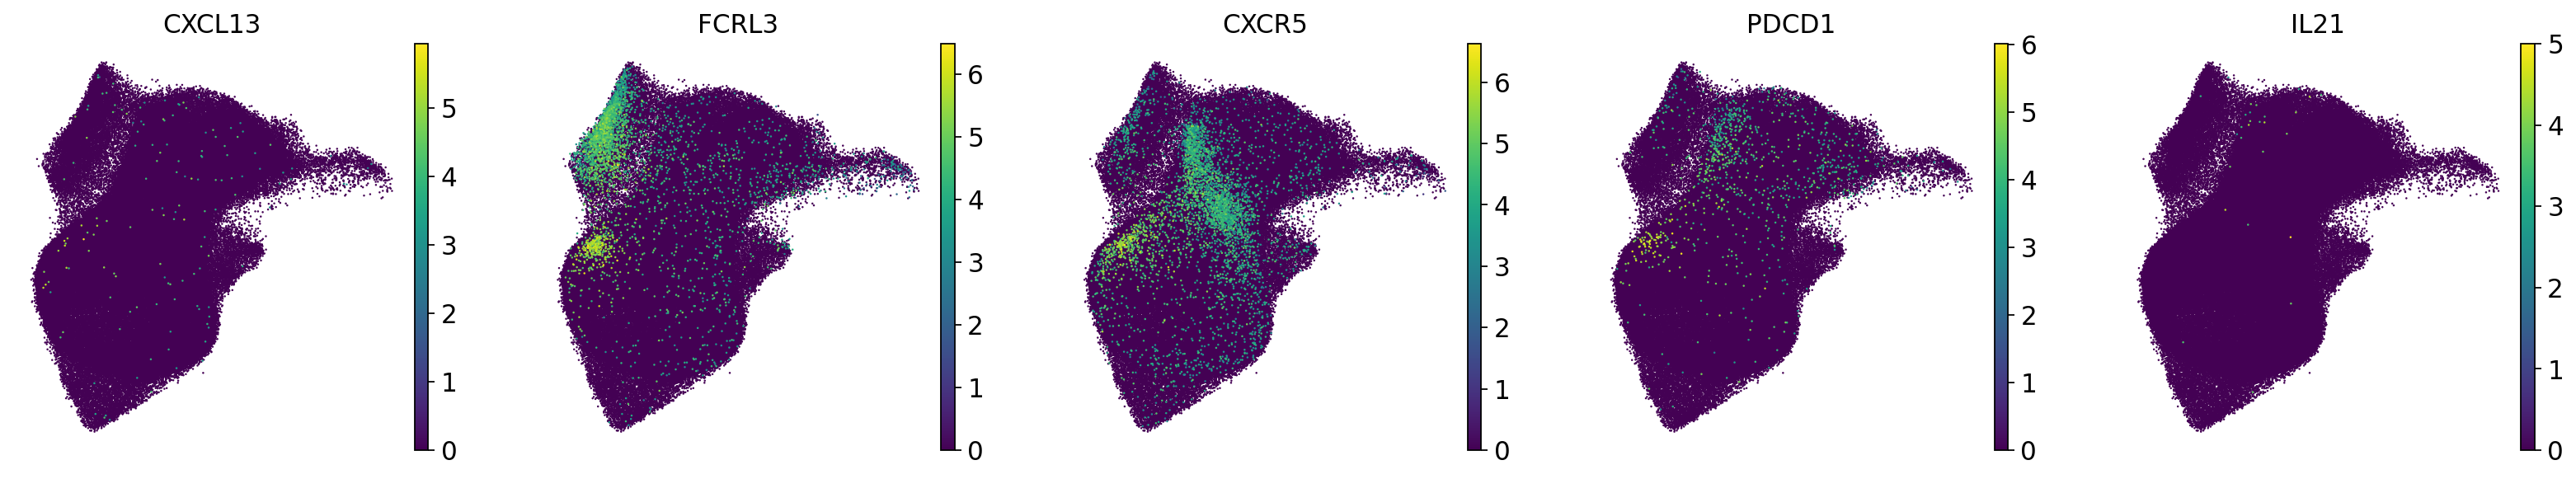

In [26]:
sc.pl.umap(adata, color=[x  for x in ['CXCL13', 'FCRL3', 'CXCR5', 'PDCD1', 'IL21'] if x in adata.raw.var.index],
          save=f'{proj}_Tph', ncols=5, sort_order=True, s=5)

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


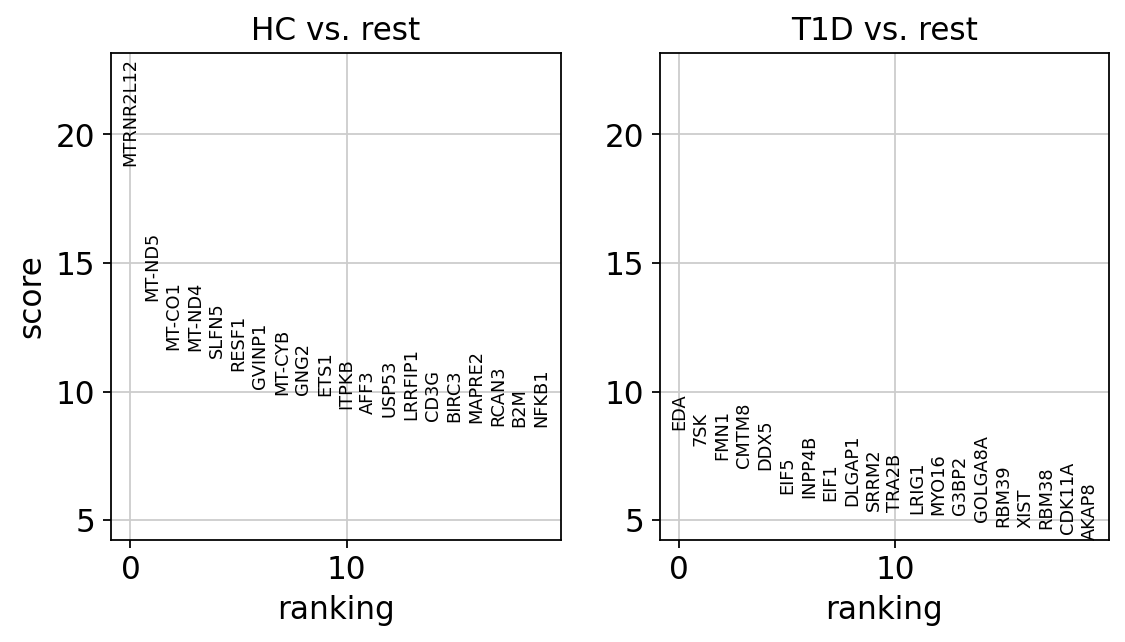

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


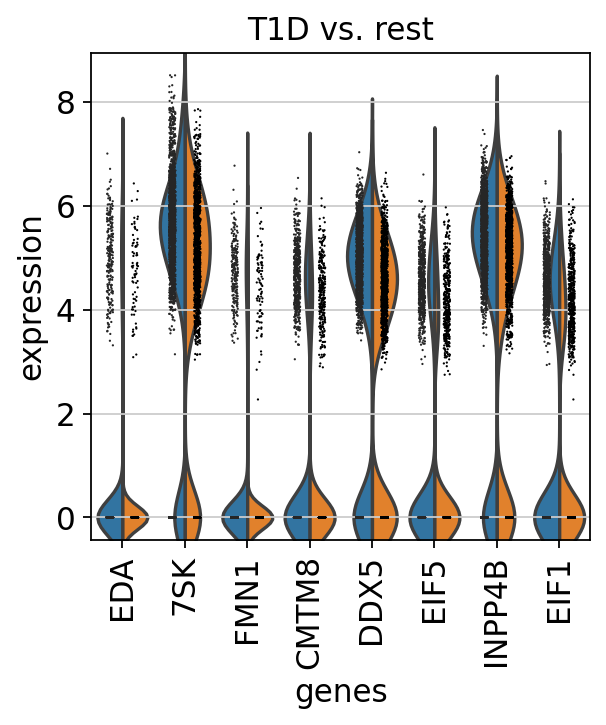

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


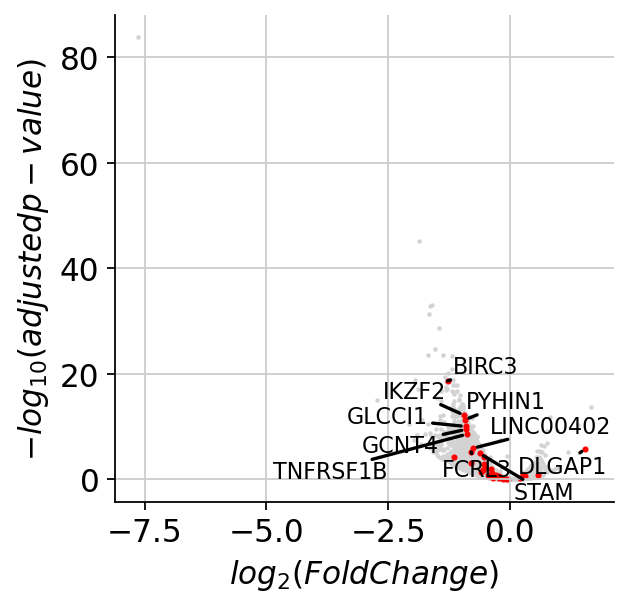

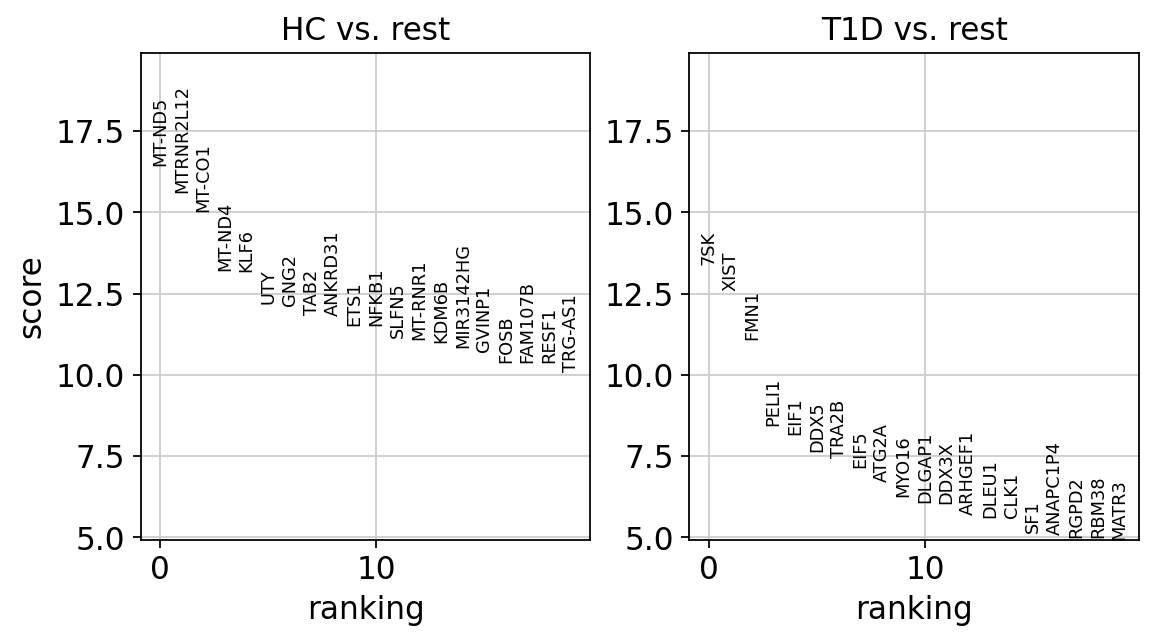

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


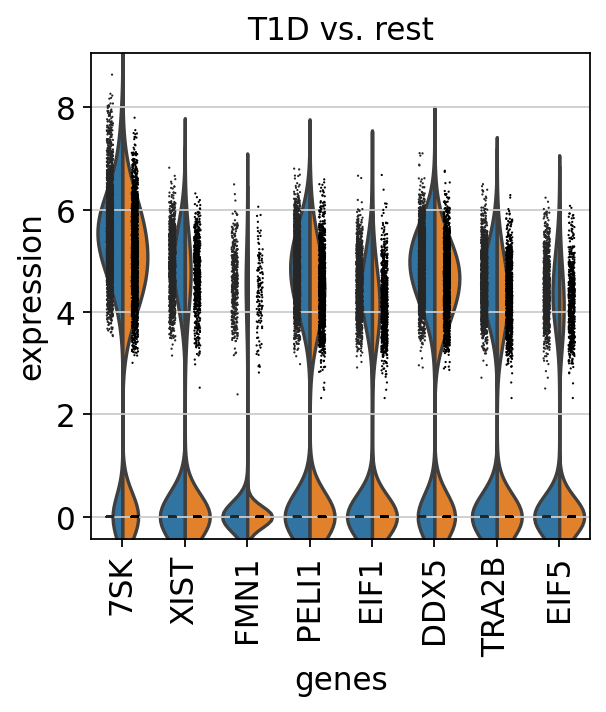

ranking genes


/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


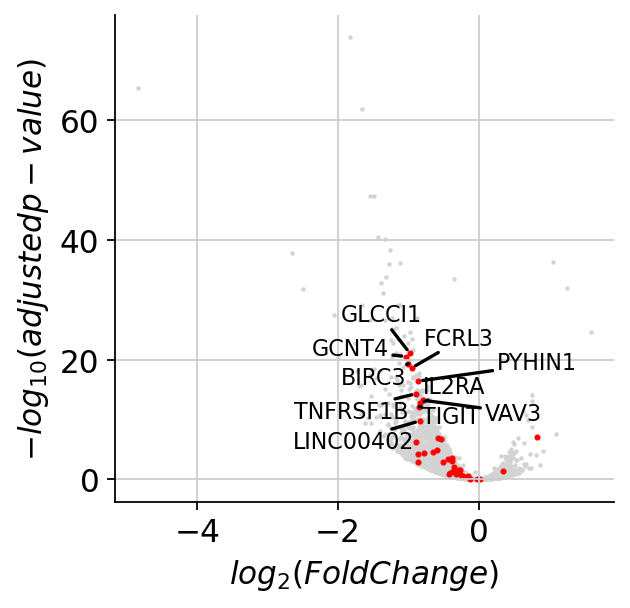

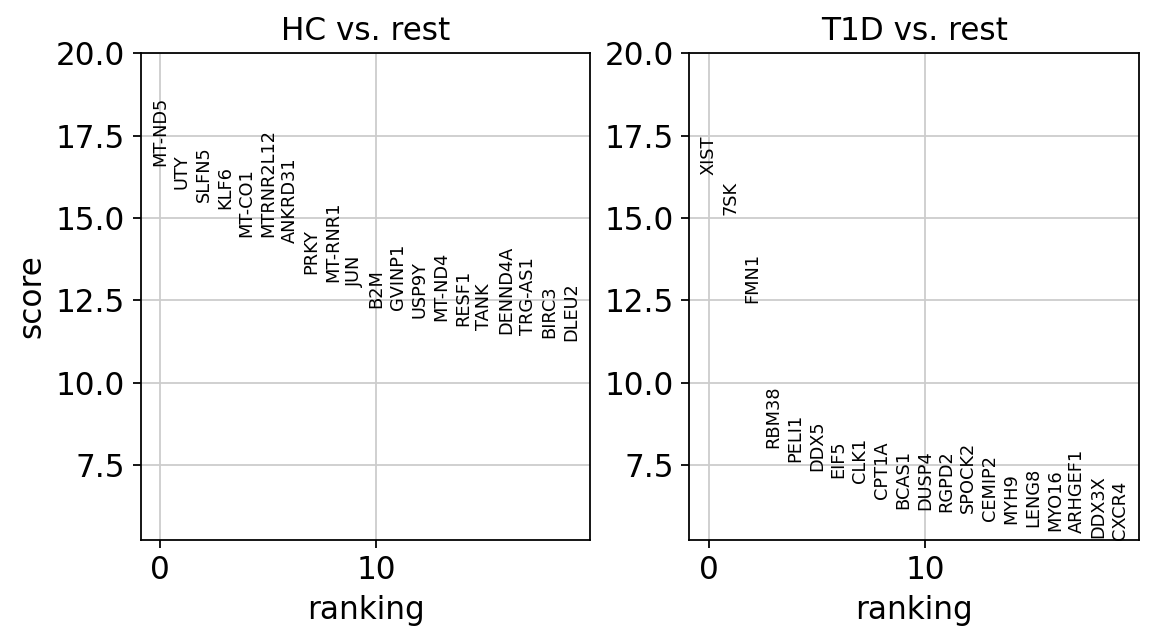

/home/yyasumizu/anaconda3/envs/scanpy1.9.3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


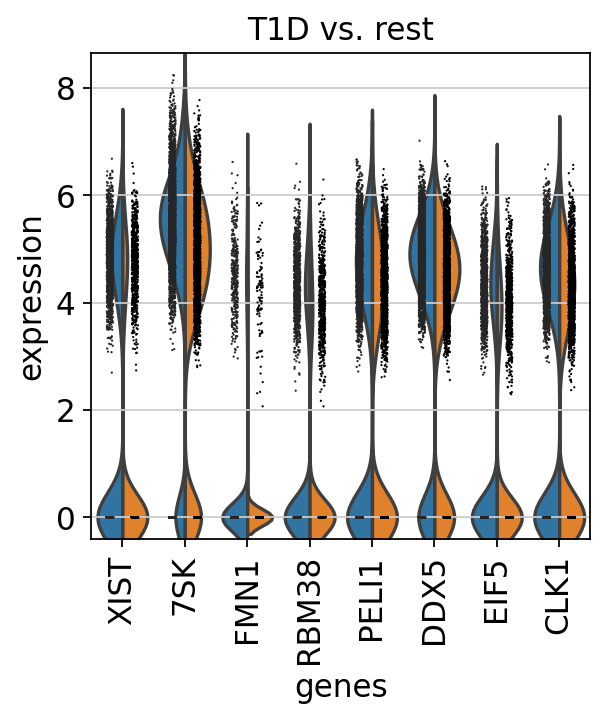

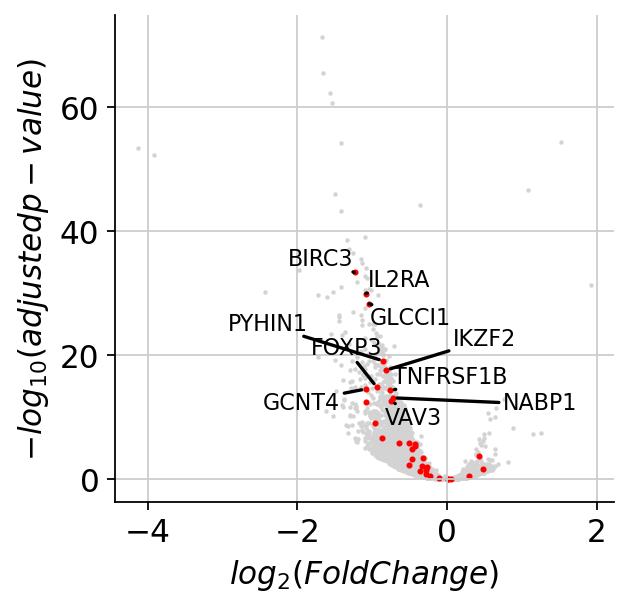

In [27]:
list_clusters = ['TregNaive', 'TregAct', 'TregEff']

for clu in list_clusters:
    a = adata[adata.obs['clusterL2'] == clu]

    sc.tl.rank_genes_groups(a, 'disease', method='t-test_overestim_var')
    sc.pl.rank_genes_groups(a, save=f'_{disease}_{clu}.pdf')
    sc.pl.rank_genes_groups_violin(a, groups=disease, n_genes=8, save=f'_{disease}_{clu}.pdf')

    result = a.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    df_result = pd.DataFrame(
        {key: result[key][disease]
        for key in ['names', 'logfoldchanges', 'pvals', 'pvals_adj']})
    df_result = pd.merge(df_result, pd.DataFrame(a.raw.to_adata().to_df().mean(), columns=['mean']), left_on='names', right_index=True, how='left')
    df_result.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.csv')

    plt.scatter(x=df_result.loc[df_result['mean']>th_mean, 'logfoldchanges'], 
    y=-np.log10(df_result.loc[df_result['mean']>th_mean,'pvals_adj']), s=1, c='lightgray')

    d = df_result[(df_result['names'].isin(list_gene))&(df_result['mean']>th_mean)]
    plt.scatter(x=d['logfoldchanges'], 
        y=-np.log10(d['pvals_adj']), s=3, c='red')

    texts = []
    for pos,row in d.sort_values(by='pvals_adj').head(10).iterrows():
        texts.append(plt.text(row['logfoldchanges'], -np.log10(row['pvals_adj']), row['names'], size=10))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=1.5))
        
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(adjusted p-value)$')
    sns.despine()
    plt.savefig(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_scatter.pdf', bbox_inches='tight')

    d.to_csv(f'{sc.settings.figdir}/DEGs_{disease}_{clu}_NMF1.csv')

In [28]:
adata.write(f'{sc.settings.figdir}/DEGs_{disease}_{clu}.h5ad')